In [ ]:
!unzip "/content/rumah_adat.zip" -d "/content"

Archive:  /content/rumah_adat.zip
   creating: /content/rumah_adat/gadang/
  inflating: /content/rumah_adat/gadang/b-1.png  
  inflating: /content/rumah_adat/gadang/b-112.png  
  inflating: /content/rumah_adat/gadang/b-117.png  
  inflating: /content/rumah_adat/gadang/b-121.png  
  inflating: /content/rumah_adat/gadang/b-14.png  
  inflating: /content/rumah_adat/gadang/b-17.png  
  inflating: /content/rumah_adat/gadang/b-24.png  
  inflating: /content/rumah_adat/gadang/b-3.png  
  inflating: /content/rumah_adat/gadang/b-35.png  
  inflating: /content/rumah_adat/gadang/b-38.png  
  inflating: /content/rumah_adat/gadang/b-42.png  
  inflating: /content/rumah_adat/gadang/b-47.png  
  inflating: /content/rumah_adat/gadang/b-49.png  
  inflating: /content/rumah_adat/gadang/b-5.png  
  inflating: /content/rumah_adat/gadang/b-53.png  
  inflating: /content/rumah_adat/gadang/b-57.png  
  inflating: /content/rumah_adat/gadang/b-7.png  
  inflating: /content/rumah_adat/gadang/b-72.png  
  inflat

# **MobileNetV2**

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D,
    Dropout, BatchNormalization
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)


In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)


In [ ]:
train_gen = datagen.flow_from_directory(
    "/content/rumah_adat",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_gen = datagen.flow_from_directory(
    "/content/rumah_adat",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset="validation",
    shuffle=False
)

print(train_gen.class_indices)


Found 3137 images belonging to 5 classes.
Found 782 images belonging to 5 classes.
{'gadang': 0, 'honai': 1, 'joglo': 2, 'panjang': 3, 'tongkonan': 4}


In [ ]:
base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False  # FREEZE


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(5, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,592,325 (9.89 MB)

 Trainable params: 331,781 (1.27 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

In [ ]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=15
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 103s 853ms/step - accuracy: 0.4608 - loss: 1.5897 - val_accuracy: 0.9271 - val_loss: 0.3402
Epoch 2/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 597ms/step - accuracy: 0.8655 - loss: 0.3862 - val_accuracy: 0.9527 - val_loss: 0.1766
Epoch 3/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 59s 595ms/step - accuracy: 0.9069 - loss: 0.2834 - val_accuracy: 0.9655 - val_loss: 0.1292
Epoch 4/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 60s 603ms/step - accuracy: 0.9157 - loss: 0.2282 - val_accuracy: 0.9706 - val_loss: 0.1121
Epoch 5/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 60s 609ms/step - accuracy: 0.9345 - loss: 0.1873 - val_accuracy: 0.9642 - val_loss: 0.1000
Epoch 6/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 60s 609ms/step - accuracy: 0.9422 - loss: 0.1674 - val_accuracy: 0.9706 - val_loss: 0.0830
Epoch 7/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 60s 605ms/step - accuracy: 0.9556 - loss: 0.1300 - val_accuracy: 0.9783 - val_loss: 0.0816
Epoch 8/15
99/99 ━━━━━━━━━━━━━━━━━━━━ 60s 608ms/step - accuracy: 0.9569 - loss: 0.1240 - val_acc

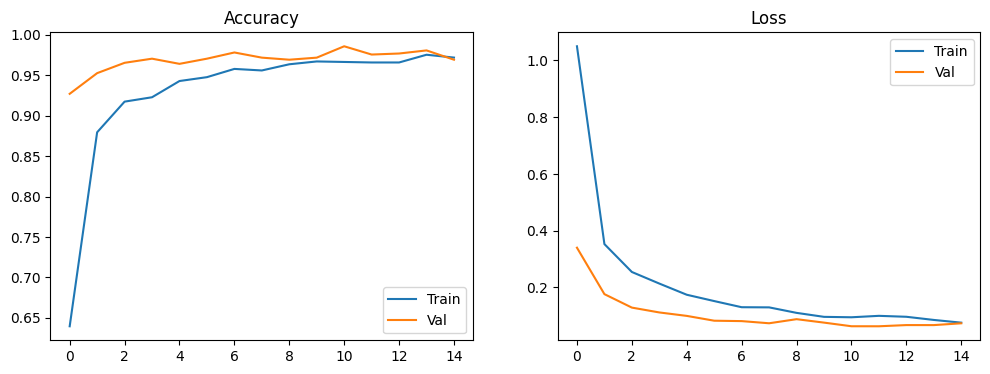

In [ ]:
def plot_history(h1, h2=None):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(h1.history['accuracy'], label='Train')
    plt.plot(h1.history['val_accuracy'], label='Val')
    if h2:
        plt.plot(
            range(len(h1.history['accuracy']),
                  len(h1.history['accuracy'])+len(h2.history['accuracy'])),
            h2.history['accuracy'], label='Fine-tune'
        )
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(h1.history['loss'], label='Train')
    plt.plot(h1.history['val_loss'], label='Val')
    if h2:
        plt.plot(
            range(len(h1.history['loss']),
                  len(h1.history['loss'])+len(h2.history['loss'])),
            h2.history['loss'], label='Fine-tune'
        )
    plt.title("Loss")
    plt.legend()

    plt.show()

plot_history(history)


In [ ]:
val_gen.reset()
pred = model.predict(val_gen)
y_pred = np.argmax(pred, axis=1)
y_true = val_gen.classes
labels = list(val_gen.class_indices.keys())


25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 635ms/step


In [ ]:
print(classification_report(y_true, y_pred, target_names=labels))


              precision    recall  f1-score   support

      gadang       0.98      0.99      0.98       192
       honai       0.98      0.99      0.99       122
       joglo       0.97      0.96      0.97       144
     panjang       0.95      0.98      0.97       124
   tongkonan       0.98      0.96      0.97       200

    accuracy                           0.98       782
   macro avg       0.97      0.98      0.98       782
weighted avg       0.98      0.98      0.98       782



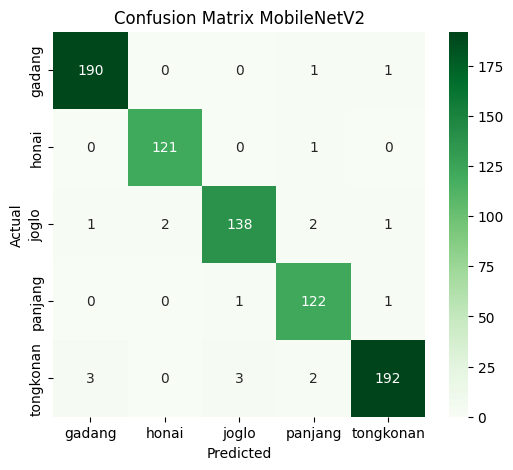

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=labels,
            yticklabels=labels,
            cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix MobileNetV2")
plt.show()


In [ ]:
model.save("mobilenetv2_rumah_adat.h5")